# Causes of Aircraft Incidents


## Problem Definition
Despite being one of the safer modes of transportation, many people have a fear of air travel due to a lack of control during flight (i.e a passanger has to trust the pilot to fly safely) as well as the severity of the incident should one occur. Understanding what causes aircraft incidents and the effects of said incidents may be able to help temper ones fear of flying. 

# Data Set
Our data set comes from Kaggle, https://www.kaggle.com/datasets/deepcontractor/aircraft-accidents-failures-hijacks-dataset.
The dataset scrapes data from Aviation Safety Network, which gathers data from all aircraft incidents involving aircraft that can carry at least 12 people, since 1919
# Variables
Most variables listed are self explanatory, those that are have some extra explanation

**Incident_Date**

**Aircraft_Model**

**Aircraft_Registration** - Unique code of the aircraft

**Aircraft_Operator** - Organisation that owns the aircraft

**Aircraft_Nature** - What kind of flight was it (cargo, transport etc.)

**Incident_Category** - Extent of the damage

**Aircraft_Damage_Type** - Specific area damaged

**Date** - Date of the incident

**Time** - Time of the incident

**Arit** - Date of the incident

**Aircraft_Engines** - Model of the engine the aircraft was using

**Onboard_Crew**

**Onboard_Passengers**

**Onboard_Total**

**Fatalities**

**Aircraft_First_Flight**

**Aircraft_Phase** - Which stage of the flight the aircraft was in (Takeoff, landing, cruising etc.)

**Departure_Airport**

**Destination_Airport**

**Ground_Casualties**

**Collision_Casualties**

In [1]:
#Import basic libaries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
#Import and check the dataset
Big_Data = pd.read_csv("Aircraft_Incident_dataset.csv")
Big_Data.head()

,Incident_Date,Aircraft_Model,Aircaft_Registration,Aircraft_Operator,Aircraft_Nature,Incident_Category,Incident_Cause(es),Incident_Location,Aircraft_Damage_Type,Date,...,Onboard_Crew,Onboard_Passengers,Onboard_Total,Fatalities,Aircraft_First_Flight,Aircraft_Phase,Departure_Airport,Destination_Airport,Ground_Casualties,Collision_Casualties
0,3/1/2022,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",near Venetia Mine...,Substantial,Monday 3 January 2022,...,Fatalities: 0 / Occupants: 3,Fatalities: 0 / Occupants: 4,Fatalities: 0 / Occupants: 7,0,1995-05-19 (26 years 8 months),Landing (LDG),Johannesburg-O.R. Tambo International Airport ...,"Venetia Mine Airport (FAVM) , South Africa",NaN,NaN
1,4/1/2022,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Roatán-Juan ...,Substantial,Tuesday 4 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 19,0,1985,Landing (LDG),La Ceiba-Goloson International Airport (LCE/MH...,Roatán-Juan Manuel Gálvez International Airpor...,NaN,NaN
2,5/1/2022,Boeing 737-4H6,EP-CAP,Caspian Airlines,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Isfahan-Shah...,Substantial,Wednesday 5 January 2022,...,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants:,Fatalities: 0 / Occupants: 116,0,1992-09-18 (29 years 4 months),Landing (LDG),"Mashhad Airport (MHD/OIMM) , Iran","Isfahan-Shahid Beheshti Airport (IFN/OIFM) , Iran",NaN,NaN
3,8/1/2022,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Hangzhou-Xia...,Destroyed,Saturday 8 January 2022,...,Fatalities: 0 / Occupants: 8,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 8,0,2002-07-18 (19 years 6 months),Standing (STD),Hangzhou-Xiaoshan International Airport (HGH/Z...,"Novosibirsk-Tolmachevo Airport (OVB/UNNT) , Ru...",NaN,NaN
4,12/1/2022,Beechcraft 200 Super King Air,NaN,private,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,"Machakilha, ...",Damaged beyond repair,Wednesday 12 January 2022,...,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,Fatalities: 0 / Occupants: 0,0,NaN,Standing (STD),?,?,NaN,NaN


In [3]:
#Check the size of the dataset
Big_Data.shape

(23519, 23)

# Data Cleaning

The dataset is very expansive and specific, since it contains every incident since 1919. We want to keep the problem simple for this project so some cleaning has to be done.

In [4]:
#Extract the data that is relevant
Aircraft = pd.DataFrame(Big_Data[["Date", "Aircraft_Model", "Aircraft_Nature", "Incident_Category", "Incident_Cause(es)", "Aircraft_Damage_Type", "Aircraft_First_Flight"]])

In [5]:
Aircraft.head()

,Date,Aircraft_Model,Aircraft_Nature,Incident_Category,Incident_Cause(es),Aircraft_Damage_Type,Aircraft_First_Flight
0,Monday 3 January 2022,British Aerospace 4121 Jetstream 41,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",Substantial,1995-05-19 (26 years 8 months)
1,Tuesday 4 January 2022,British Aerospace 3101 Jetstream 31,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,1985
2,Wednesday 5 January 2022,Boeing 737-4H6,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,1992-09-18 (29 years 4 months)
3,Saturday 8 January 2022,Tupolev Tu-204-100C,Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Destroyed,2002-07-18 (19 years 6 months)
4,Wednesday 12 January 2022,Beechcraft 200 Super King Air,Illegal Flight,"Criminal occurrence (sabotage, shoot down) | h...",Result - Damaged on the ground,Damaged beyond repair,NaN


We removed incidents with NULL values or unavailable information, as well as incidents that occured due to criminal activities like hijackings or enemy attacks

In [6]:
Aircraft = Aircraft.dropna()
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'Criminal occurrence (sabotage, shoot down) | hull-loss'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Cause(es)'] == 'Info-Unavailable'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'other occurrence (ground fire, sabotage) | hull-loss'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'Hijacking | repairable-damage'], inplace = False)
Aircraft.shape

(9356, 7)

We wanted to factor in the age of the aircraft (by year) as well, which required extracting only the year from the date given in Aircraft_First_Flight

In [7]:
Aircraft['Aircraft_First_Flight'] = Aircraft['Aircraft_First_Flight'].str.split(' ').str[0]

In [8]:
Aircraft['Aircraft_First_Flight'] = pd.to_datetime(Aircraft['Aircraft_First_Flight'])
Aircraft['Aircraft_First_Flight'] = Aircraft['Aircraft_First_Flight'].dt.strftime('%Y-%m-%d')
Aircraft['Aircraft_First_Flight'] = Aircraft['Aircraft_First_Flight'].str.split('-').str[0]

In [9]:
Aircraft['Date'] = Aircraft['Date'].str.split(' ').str[3]

In [10]:
Aircraft = Aircraft.dropna()
Aircraft['Date'] = Aircraft['Date'].astype(int)
Aircraft['Aircraft_First_Flight'] = Aircraft['Aircraft_First_Flight'].astype(int)

To make things more relevant, we exlcuded incidents that happened before the year 2000. We also changed Aircraft_First_Flight to Aircraft_Age.

In [11]:
Aircraft['Aircraft_First_Flight'] = Aircraft["Date"] - Aircraft["Aircraft_First_Flight"]
Aircraft = Aircraft.rename(columns={"Aircraft_First_Flight":"Aircraft_Age"})
Aircraft = Aircraft.rename(columns={"Incident_Cause(es)":"Incident_Causes"})
Aircraft = Aircraft[Aircraft['Date'] > 2000] 
Aircraft.head()

,Date,Aircraft_Model,Aircraft_Nature,Incident_Category,Incident_Causes,Aircraft_Damage_Type,Aircraft_Age
0,2022,British Aerospace 4121 Jetstream 41,Domestic Non Scheduled Passenger,Accident | repairable-damage,"Airplane - Engines, Airplane - Engines - Prop/...",Substantial,27
1,2022,British Aerospace 3101 Jetstream 31,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,37
2,2022,Boeing 737-4H6,Domestic Scheduled Passenger,Accident | repairable-damage,"Airplane - Undercarriage, Airplane - Undercarr...",Substantial,30
3,2022,Tupolev Tu-204-100C,Cargo,Accident | hull-loss,"Cargo - Fire/smoke, Result - Damaged on the gr...",Destroyed,20
5,2022,Airbus A320-232,Domestic Scheduled Passenger,Accident | repairable-damage,"Landing/takeoff - Tailstrike, Result - Runway ...",Substantial,14


Below, we checked for the different Incident Causes, Aircraft Models and Incident Categories. We found it necessary to reclassify Incident_Causes as many incidents were too specific and can be summerised, or were extremely similar.

For example, "Flightcrew - Disorientation" and "Flightcrew - Alcohol" are classified seperately but can be reclassified under "Human Error".

In [12]:
print(Aircraft.Incident_Causes.value_counts())

Result - Runway excursion                                                                                                                             497
Result - Loss of control                                                                                                                              174
Result - Damaged on the ground                                                                                                                        132
Collision - Aircraft, Collision - Aircraft - On ground (platform), Result - Damaged on the ground                                                     121
Result - CFIT - Hill, mountain                                                                                                                        105
                                                                                                                                                     ... 
Maintenance - Wrong installation of parts, Result - Runway excursion        

In [13]:
print(Aircraft.Aircraft_Model.value_counts())

Cessna 208B Grand Caravan                   166
Antonov An-2R                                70
de Havilland Canada DHC-6 Twin Otter 300     69
Beechcraft 200 Super King Air                43
Swearingen SA227-AC Metro III                38
                                           ... 
Boeing 737-8GK (WL)                           1
Beechcraft MC-12W Liberty (King Air 350)      1
Boeing 747-428BCF                             1
Boeing KC-137E (707-324C)                     1
Boeing 747-128 (SF)                           1
Name: Aircraft_Model, Length: 1013, dtype: int64


In [14]:
print(Aircraft.Incident_Category.value_counts())

Accident | hull-loss                                              1849
Accident | repairable-damage                                      1190
other occurrence (ground fire, sabotage) | repairable-damage        38
Criminal occurrence (sabotage, shoot down) | repairable-damage      12
Incident | repairable-damage                                         8
Hijacking | hull-loss                                                4
Name: Incident_Category, dtype: int64


In [15]:
## Dropped all unrelated incidents -> Criminal activities
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'Hijacking | hull-loss'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'Criminal occurrence (sabotage, shoot down) | repairable-damage'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'Criminal occurrence (sabotage, shoot down) | hull-loss'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'other occurrence (ground fire, sabotage) | repairable-damage'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Category'] == 'Incident | repairable-damage'], inplace = False)

In [16]:
Human_Flightcrew = Aircraft[Aircraft['Incident_Causes'].str.contains("Flightcrew")]
Human_Maintenance = Aircraft[Aircraft['Incident_Causes'].str.contains("Maintenance")]
Human_ATC = Aircraft[Aircraft['Incident_Causes'].str.contains("ATC")]
Human_Flightcrew.shape

(123, 7)

In [17]:
#Classifying as human error
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Flightcrew"), 'Incident_Causes'] = 'Human Error'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Maintenance"), 'Incident_Causes'] = 'Human Error'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("ATC"), 'Incident_Causes'] = 'Human Error'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Cargo"), 'Incident_Causes'] = 'Human Error'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("CFIT"), 'Incident_Causes'] = 'Human Error'

In [18]:
#All other classification
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Weather"), 'Incident_Causes'] = 'Weather'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Collision - Object"), 'Incident_Causes'] = 'Collision - Object'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Cargo door"), 'Incident_Causes'] = 'Cargo Door'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Fuselage"), 'Incident_Causes'] = 'Fuselage'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Passenger door"), 'Incident_Causes'] = 'Passenger door'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Tail"), 'Incident_Causes'] = 'Tail'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Wing"), 'Incident_Causes'] = 'Wing'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Undercarriage - Landing gear collapse"), 'Incident_Causes'] = 'Undercarriage - Landing gear collapse'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Undercarriage - Gear-up landing"), 'Incident_Causes'] = 'Undercarriage - Gear-up landing'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Engines - All engine powerloss"), 'Incident_Causes'] = 'Engines - All engine powerloss'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Collision - Aircraft - On ground (platform)"), 'Incident_Causes'] = 'Collision - Onground (platform)'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Engines - Fuel contamination"), 'Incident_Causes'] = 'Engines - Fuel contamination'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Undercarriage - Brakes"), 'Incident_Causes'] = 'Undercarriage - Brakes'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Collision - Aircraft"), 'Incident_Causes'] = 'Collision - Aircraft'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Airplane - Undercarriage - Tire failure"), 'Incident_Causes'] = 'Airplane - Undercarriage - Tire failure'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Fire - Inflight"), 'Incident_Causes'] = 'Fire - Inflight'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Engines - Fire"), 'Incident_Causes'] = 'Engine - Fire'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Engines - Uncontained failure"), 'Incident_Causes'] = 'Engine - Uncontained failure'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Fire - Hangar"), 'Incident_Causes'] = 'Fire'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Fire - Fire"), 'Incident_Causes'] = 'Fire'


C:\Users\Holdon\AppData\Local\Temp/ipykernel_5512/2715659920.py:12: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Collision - Aircraft - On ground (platform)"), 'Incident_Causes'] = 'Collision - Onground (platform)'


In [19]:
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Unknown - Missing'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Loss of control, Security - Shot, Security - Shot - Surface-to-air'], inplace = False)

Leftover incidents that we could not classify and occurred less than 10 times were dropped as well.

In [20]:
ones = Aircraft.Incident_Causes.value_counts()<10
Aircraft = Aircraft[~Aircraft['Incident_Causes'].isin(ones[ones==1].index)]
Aircraft.shape

(2765, 7)

In [21]:
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Landing - Heavy"), 'Incident_Causes'] = 'Landing - Heavy'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Unstabilized approach"), 'Incident_Causes'] = 'Landing - Unstabilized approach'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Engines - Fuel starvation"), 'Incident_Causes'] = 'Engines - Fuel starvation'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Airplane - Engines"), 'Incident_Causes'] = 'Engine Failure'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Landing/takeoff - Landing, Landing/takeoff - Landing - Late, far down rwy, Result - Runway excursion"), 'Incident_Causes'] = 'Human Error'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Landing/takeoff - Landing, Landing/takeoff - Landing - Fast, Result - Runway excursion"), 'Incident_Causes'] = 'Human Error'
Aircraft.loc[Aircraft['Incident_Causes'].str.contains("Landing - Heavy"), 'Incident_Causes'] = 'Human Error'

In [22]:
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Landing/takeoff - Takeoff - Aborted, Result - Runway excursion'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Landing/takeoff - Landing, Landing/takeoff - Landing - Bounced, Result - Runway mishap'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Runway excursion'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Loss of control'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Damaged on the ground'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Runway mishap'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Emergency, forced landing - Outside airport'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Undershoot / overshoot'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Emergency, forced landing - On runway'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Emergency, forced landing - Ditching'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Loss of control, Unknown - Cause undetermined'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Incident_Causes'] == 'Result - Loss of control, Result - Loss of control (presumed)'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Aircraft_Damage_Type'] == 'None'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Aircraft_Damage_Type'] == 'Missing'], inplace = False)
Aircraft = Aircraft.drop(Aircraft.index[Aircraft['Aircraft_Damage_Type'] == 'Unknown'], inplace = False)

Below is the reclassified Incident_Causes

In [23]:
print(Aircraft.Incident_Causes.value_counts())

Human Error                                563
Undercarriage - Landing gear collapse      162
Collision - Object                         156
Collision - Aircraft                       151
Undercarriage - Gear-up landing            132
Weather                                    129
Tail                                        81
Engines - All engine powerloss              77
Engine Failure                              33
Landing - Unstabilized approach             31
Engine - Uncontained failure                22
Engines - Fuel starvation                   21
Airplane - Undercarriage - Tire failure     18
Engine - Fire                               15
Undercarriage - Brakes                      12
Fire                                        12
Name: Incident_Causes, dtype: int64


For Aircraft_Damage_Type, we reclassified the different classes into numerical values for easier data processing.

In [24]:
print(Aircraft.Aircraft_Damage_Type.value_counts())

Substantial              871
Destroyed                359
Damaged beyond repair    298
Minor                     87
Name: Aircraft_Damage_Type, dtype: int64


In [25]:
Aircraft.loc[Aircraft['Aircraft_Damage_Type'].str.contains("Minor"), 'Aircraft_Damage_Type'] = '1'
Aircraft.loc[Aircraft['Aircraft_Damage_Type'].str.contains("Substantial"), 'Aircraft_Damage_Type'] = '2'
Aircraft.loc[Aircraft['Aircraft_Damage_Type'].str.contains("Damaged beyond repair"), 'Aircraft_Damage_Type'] = '3'
Aircraft.loc[Aircraft['Aircraft_Damage_Type'].str.contains("Destroyed"), 'Aircraft_Damage_Type'] = '4'
#convert to int
Aircraft['Aircraft_Damage_Type'] = Aircraft['Aircraft_Damage_Type'].astype(int)
print(Aircraft.Aircraft_Damage_Type.value_counts())

2    871
4    359
3    298
1     87
Name: Aircraft_Damage_Type, dtype: int64


In [26]:
Aircraft = pd.DataFrame(Aircraft[["Date", "Aircraft_Model", "Aircraft_Nature", "Incident_Causes", "Aircraft_Damage_Type", "Aircraft_Age"]])

Our final size of the dataset comes to 1615 entries.

In [27]:
Aircraft.shape

(1615, 6)

We reclassified Aircraft_Model into their respective manufaturers for easier classification.

In [28]:
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Cessna"), 'Aircraft_Model'] = 'Cessna'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("British Aerospace"), 'Aircraft_Model'] = 'British Aerospace'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Boeing"), 'Aircraft_Model'] = 'Boeing'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Tupolev"), 'Aircraft_Model'] = 'Tupolev'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Airbus"), 'Aircraft_Model'] = 'Airbus'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("de Havilland Canada"), 'Aircraft_Model'] = 'de Havilland Canada'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Antonov"), 'Aircraft_Model'] = 'Antonov'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Beechcraft"), 'Aircraft_Model'] = 'Beechcraft'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Fokker"), 'Aircraft_Model'] = 'Fokker'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Learjet"), 'Aircraft_Model'] = 'Learjet'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Swearingen"), 'Aircraft_Model'] = 'Swearingen'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Canadair"), 'Aircraft_Model'] = 'Canadair'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Ilyushin"), 'Aircraft_Model'] = 'Ilyushin'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Embraer"), 'Aircraft_Model'] = 'Embraer'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Douglas"), 'Aircraft_Model'] = 'Douglas'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Dassault"), 'Aircraft_Model'] = 'Dassault'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("ATR"), 'Aircraft_Model'] = 'ATR'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Let"), 'Aircraft_Model'] = 'Let'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Xian"), 'Aircraft_Model'] = 'Xian'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Avro"), 'Aircraft_Model'] = 'Avro'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Lockheed"), 'Aircraft_Model'] = 'Lockheed'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Raytheon"), 'Aircraft_Model'] = 'Raytheon'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Britten-Norman"), 'Aircraft_Model'] = 'Britten-Norman'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Eclipse"), 'Aircraft_Model'] = 'Eclipse'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Shorts"), 'Aircraft_Model'] = 'Shorts'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Hawker"), 'Aircraft_Model'] = 'Hawker'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Bombardier"), 'Aircraft_Model'] = 'Bombardier'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Saab"), 'Aircraft_Model'] = 'Saab'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Dornier"), 'Aircraft_Model'] = 'Dornier'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Gulfstream"), 'Aircraft_Model'] = 'Gulfstream'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Grumman"), 'Aircraft_Model'] = 'Grumman'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Convair"), 'Aircraft_Model'] = 'Convair'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Honda"), 'Aircraft_Model'] = 'Honda'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("CASA"), 'Aircraft_Model'] = 'CASA'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Basler"), 'Aircraft_Model'] = 'Basler'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Viking Air"), 'Aircraft_Model'] = 'Viking Air'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Rockwell"), 'Aircraft_Model'] = 'Rockwell'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("North American"), 'Aircraft_Model'] = 'North American'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("IAI"), 'Aircraft_Model'] = 'IAI'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Mitusbishi"), 'Aircraft_Model'] = 'Mitusbishi'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Fairchild"), 'Aircraft_Model'] = 'Fairchild'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Yakovlev"), 'Aircraft_Model'] = 'Yakovlev'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Transall"), 'Aircraft_Model'] = 'Transall'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Sukhoi"), 'Aircraft_Model'] = 'Sukhoi'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("GAF"), 'Aircraft_Model'] = 'GAF'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("AMI"), 'Aircraft_Model'] = 'AMI'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Harbin"), 'Aircraft_Model'] = 'Harbin'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("PZL"), 'Aircraft_Model'] = 'PZL'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("HFB"), 'Aircraft_Model'] = 'HFB'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Lisunov"), 'Aircraft_Model'] = 'Lisunov'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Volpar"), 'Aircraft_Model'] = 'Volpar'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Spectrum"), 'Aircraft_Model'] = 'Spectrum'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Grob"), 'Aircraft_Model'] = 'Grob'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Cirrus"), 'Aircraft_Model'] = 'Cirrus'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Shijiazhuang"), 'Aircraft_Model'] = 'Shijiazhuang'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Curtiss"), 'Aircraft_Model'] = 'Curtiss'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Junkers"), 'Aircraft_Model'] = 'Junkers'
Aircraft.loc[Aircraft['Aircraft_Model'].str.contains("Alenia"), 'Aircraft_Model'] = 'Alenia'

# Cleaned dataset

In [29]:
Aircraft.head()

,Date,Aircraft_Model,Aircraft_Nature,Incident_Causes,Aircraft_Damage_Type,Aircraft_Age
0,2022,British Aerospace,Domestic Non Scheduled Passenger,Collision - Object,2,27
1,2022,British Aerospace,Domestic Scheduled Passenger,Undercarriage - Landing gear collapse,2,37
2,2022,Boeing,Domestic Scheduled Passenger,Undercarriage - Landing gear collapse,2,30
3,2022,Tupolev,Cargo,Human Error,4,20
5,2022,Airbus,Domestic Scheduled Passenger,Tail,2,14


In [30]:
pd.set_option('display.max_rows',500)
Aircraft.Aircraft_Model.value_counts()

Boeing                 244
Cessna                 235
Beechcraft             173
Antonov                126
de Havilland Canada    110
Airbus                  98
Douglas                 67
Embraer                 42
Swearingen              39
Britten-Norman          39
ATR                     37
Canadair                35
Learjet                 35
Fokker                  34
British Aerospace       30
Let                     26
Lockheed                24
Tupolev                 23
Ilyushin                23
Dassault                17
Dornier                 15
Bombardier              14
Convair                 14
CASA                    10
Gulfstream              10
Shorts                  10
Saab                     9
Avro                     9
Hawker                   8
Raytheon                 6
Xian                     5
Rockwell                 5
Eclipse                  4
Viking Air               3
Yakovlev                 3
IAI                      3
AMI                      2
G

In [31]:
print(Aircraft.Incident_Causes.value_counts())

Human Error                                563
Undercarriage - Landing gear collapse      162
Collision - Object                         156
Collision - Aircraft                       151
Undercarriage - Gear-up landing            132
Weather                                    129
Tail                                        81
Engines - All engine powerloss              77
Engine Failure                              33
Landing - Unstabilized approach             31
Engine - Uncontained failure                22
Engines - Fuel starvation                   21
Airplane - Undercarriage - Tire failure     18
Engine - Fire                               15
Undercarriage - Brakes                      12
Fire                                        12
Name: Incident_Causes, dtype: int64


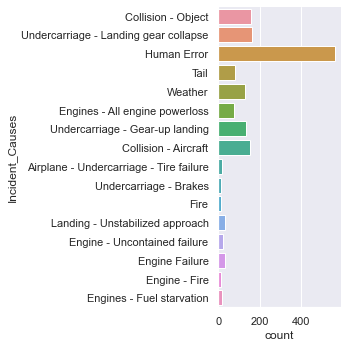

In [32]:
#Basic catplot for Incident_Causes
sb.catplot(y = "Incident_Causes", data = Aircraft, kind = "count")

## Decision Tree Classifier to see if Aircraft_Age can predict Aircraft_Damage_Type

In [33]:
ADT = pd.DataFrame(Aircraft['Aircraft_Age'])
AAG = pd.DataFrame(Aircraft['Aircraft_Damage_Type'])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
ADT_Train, ADT_Test, AAG_Train, AAG_Test = train_test_split(ADT, AAG, test_size = 0.20)

In [35]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

In [36]:
dectree.fit(ADT_Train, AAG_Train)

DecisionTreeClassifier(max_depth=4)

[Text(589.248, 587.0880000000001, 'Aircraft_Age <= 10.5\ngini = 0.627\nsamples = 1292\nvalue = [70, 690, 250, 282]\nclass = 2'),
 Text(267.84000000000003, 456.624, 'Aircraft_Age <= 4.5\ngini = 0.588\nsamples = 311\nvalue = [31, 185, 39, 56]\nclass = 2'),
 Text(107.13600000000001, 326.1600000000001, 'Aircraft_Age <= 0.5\ngini = 0.587\nsamples = 141\nvalue = [20, 84, 13, 24]\nclass = 2'),
 Text(53.568000000000005, 195.69600000000003, 'gini = 0.595\nsamples = 20\nvalue = [0, 11, 4, 5]\nclass = 2'),
 Text(160.704, 195.69600000000003, 'Aircraft_Age <= 3.5\ngini = 0.579\nsamples = 121\nvalue = [20, 73, 9, 19]\nclass = 2'),
 Text(107.13600000000001, 65.23200000000008, 'gini = 0.548\nsamples = 96\nvalue = [15, 61, 7, 13]\nclass = 2'),
 Text(214.27200000000002, 65.23200000000008, 'gini = 0.666\nsamples = 25\nvalue = [5, 12, 2, 6]\nclass = 2'),
 Text(428.54400000000004, 326.1600000000001, 'Aircraft_Age <= 9.5\ngini = 0.584\nsamples = 170\nvalue = [11, 101, 26, 32]\nclass = 2'),
 Text(374.9760000

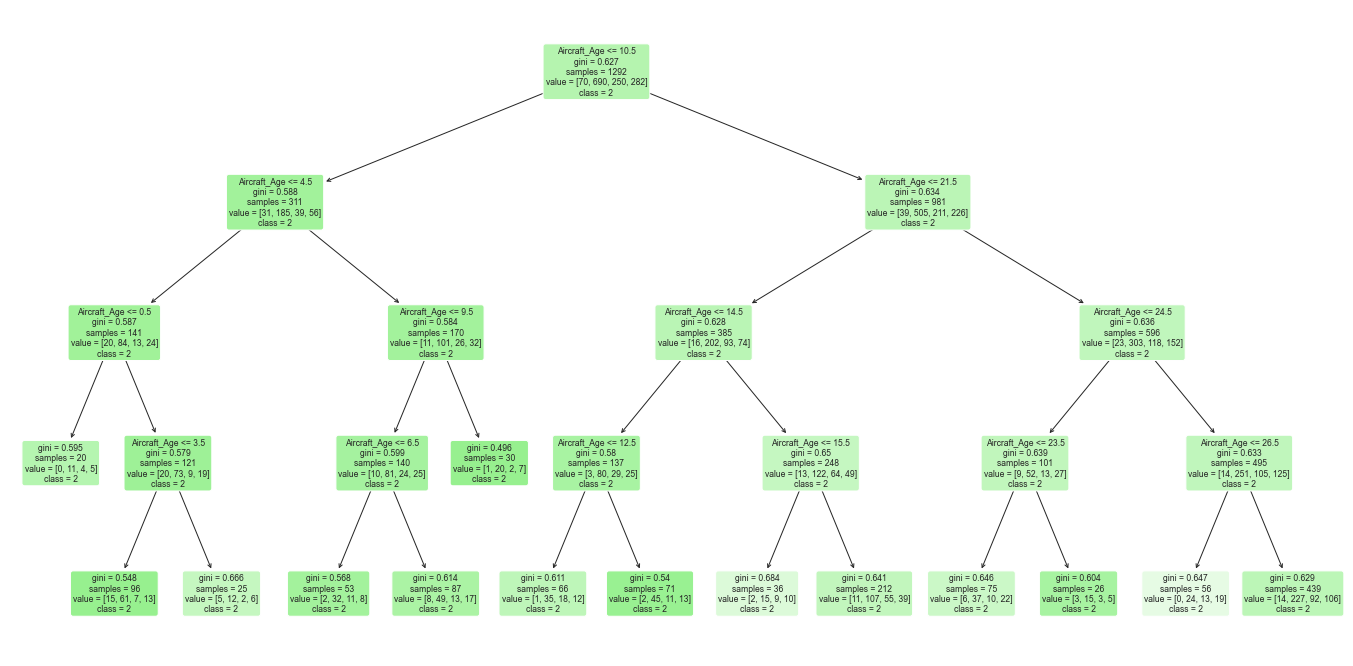

In [37]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Aircraft_Age"], 
          class_names=["1","2","3","4"])

In [38]:
AAG_Test_pred = dectree.predict(ADT_Test)

In [39]:
print("Classification Accuracy of test:", dectree.score(ADT_Test,AAG_Test))

Classification Accuracy of test: 0.5603715170278638


<AxesSubplot:>

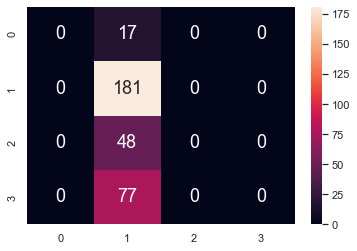

In [40]:
sb.heatmap(confusion_matrix(AAG_Test, AAG_Test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**Conclusion**

Predicting Aircraft Damage Type with aircraft age is not the best due to poor classification accuracy

## Predicting Incident Cause with Damage Type

In [41]:
y = pd.DataFrame(Aircraft['Incident_Causes'].astype('category'))
x = pd.DataFrame(Aircraft['Aircraft_Damage_Type'])

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [43]:
dectree2 = DecisionTreeClassifier(max_depth = 4)
dectree2.fit(x_train,y_train)

y_test_pred = dectree2.predict(x_test)

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.3157894736842105



<AxesSubplot:>

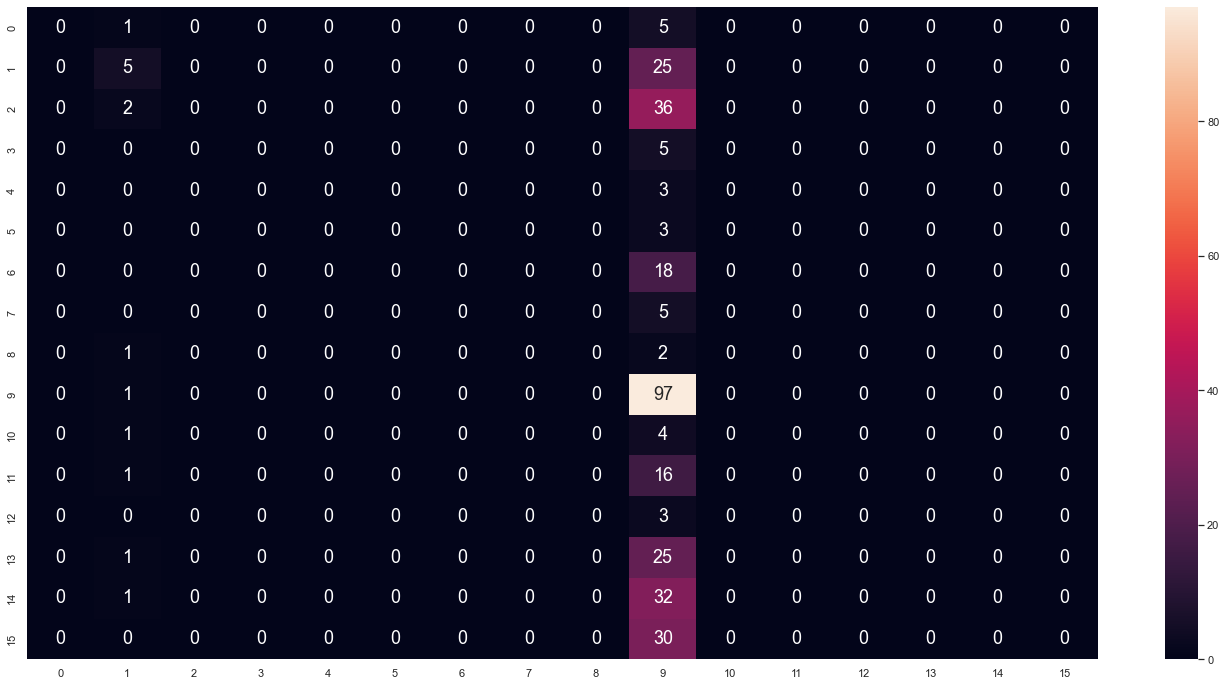

In [44]:
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree2.score(x_test, y_test))
print()

# Plot the Confusion Matrix for Test
f = plt.figure(figsize=(24,12))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[Text(669.6, 543.6, 'Aircraft_Damage_Type <= 2.5\ngini = 0.825\nsamples = 1292\nvalue = [12, 121, 118, 10, 19, 30, 59, 16, 9, 465, 26, 64\n9, 106, 129, 99]\nclass = Undercarriage - Brakes'),
 Text(334.8, 326.16, 'Aircraft_Damage_Type <= 1.5\ngini = 0.881\nsamples = 766\nvalue = [10, 108, 91, 6, 15, 8, 32, 8, 5, 146, 20, 60\n8, 96, 108, 45]\nclass = Undercarriage - Brakes'),
 Text(167.4, 108.72000000000003, 'gini = 0.669\nsamples = 73\nvalue = [1, 40, 7, 1, 1, 0, 0, 1, 0, 4, 2, 3, 0, 8\n4, 1]\nclass = Undercarriage - Landing gear collapse'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.88\nsamples = 693\nvalue = [9, 68, 84, 5, 14, 8, 32, 7, 5, 142, 18, 57, 8\n88, 104, 44]\nclass = Undercarriage - Brakes'),
 Text(1004.4000000000001, 326.16, 'Aircraft_Damage_Type <= 3.5\ngini = 0.611\nsamples = 526\nvalue = [2, 13, 27, 4, 4, 22, 27, 8, 4, 319, 6, 4, 1\n10, 21, 54]\nclass = Undercarriage - Brakes'),
 Text(837.0, 108.72000000000003, 'gini = 0.717\nsamples = 243\nvalue = [2, 8, 13

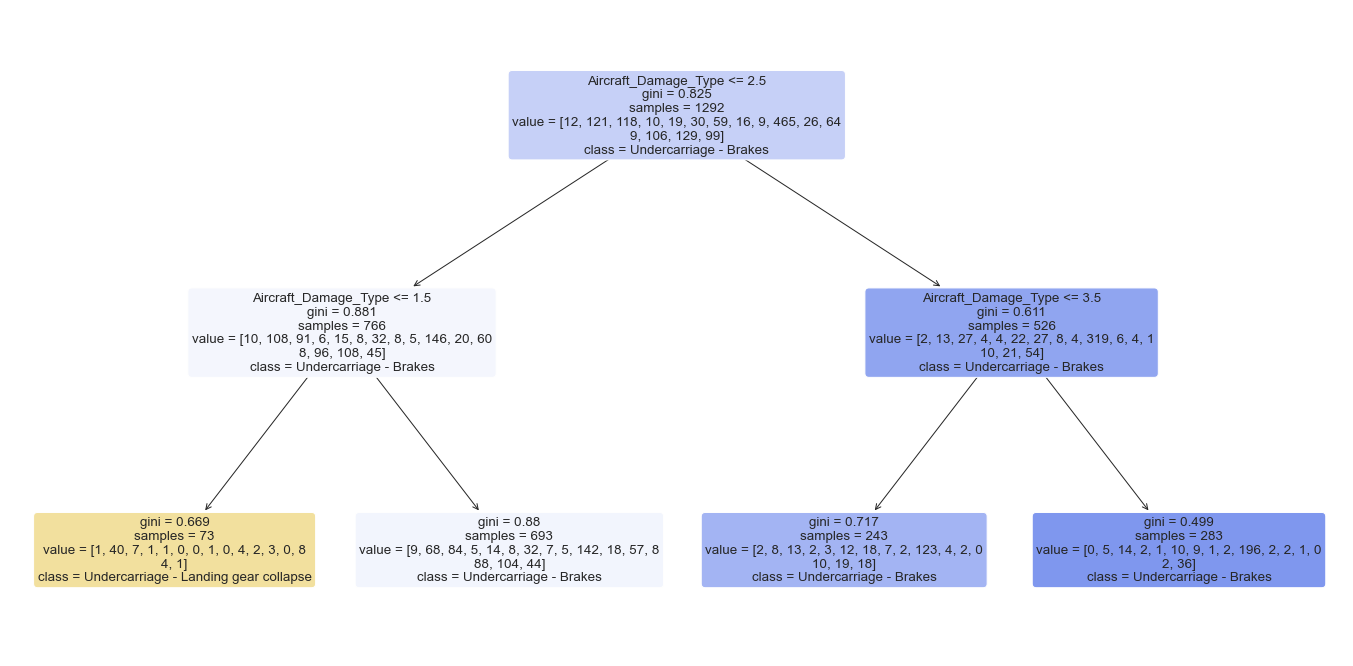

In [45]:
f = plt.figure(figsize=(24,12))
plot_tree(dectree2, filled=True, rounded=True, 
          feature_names=["Aircraft_Damage_Type"], 
          class_names=['Collision - Object', 'Undercarriage - Landing gear collapse',
       'Human Error', 'Tail', 'Weather', 'Engines - All engine powerloss',
       'Undercarriage - Gear-up landing', 'Collision - Aircraft',
       'Airplane - Undercarriage - Tire failure',
       'Undercarriage - Brakes', 'Engine Failure', 'Fire',
       'Landing - Unstabilized approach', 'Engine - Uncontained failure',
       'Engine - Fire', 'Engines - Fuel starvation'])

**Conclusion**

Predicting incident cause with damage type is also quite poor, since it has a low classification matrix

sidenote: if we stick with this problem definition, should it be predicting damage type with incident cause?

## Using OneHot encoding to use multiple classes to predict Aircraft Damage Type

In [46]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
Aircraft_cat = Aircraft[['Aircraft_Model','Incident_Causes']]
ohe.fit(Aircraft_cat)
Aircraft_cat_ohe = pd.DataFrame(ohe.transform(Aircraft_cat).toarray(), 
                                  columns=ohe.get_feature_names(Aircraft_cat.columns))

# Check the encoded variables
Aircraft_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 74 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Aircraft_Model_AMI                                       1615 non-null   float64
 1   Aircraft_Model_ATR                                       1615 non-null   float64
 2   Aircraft_Model_Airbus                                    1615 non-null   float64
 3   Aircraft_Model_Alenia                                    1615 non-null   float64
 4   Aircraft_Model_Antonov                                   1615 non-null   float64
 5   Aircraft_Model_Avro                                      1615 non-null   float64
 6   Aircraft_Model_Basler                                    1615 non-null   float64
 7   Aircraft_Model_Beechcraft                                1615 non-null   float64
 8   Aircraft_Model_Boeing       

In [47]:
# Combining Numeric features with the OHE Categorical features
Aircraft_num = Aircraft[['Aircraft_Age']].reset_index()
# Resetting the index is necessary or else the data will be mis-indexed
Aircraft_res = Aircraft['Aircraft_Damage_Type'].reset_index()
Aircraft_ohe = pd.concat([Aircraft_num, Aircraft_cat_ohe, Aircraft_res], 
                           sort = False, axis = 1).reindex(index=Aircraft_num.index)

Aircraft_ohe=Aircraft_ohe.drop(columns='index')
# Check the final dataframe
Aircraft_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 76 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Aircraft_Age                                             1615 non-null   int32  
 1   Aircraft_Model_AMI                                       1615 non-null   float64
 2   Aircraft_Model_ATR                                       1615 non-null   float64
 3   Aircraft_Model_Airbus                                    1615 non-null   float64
 4   Aircraft_Model_Alenia                                    1615 non-null   float64
 5   Aircraft_Model_Antonov                                   1615 non-null   float64
 6   Aircraft_Model_Avro                                      1615 non-null   float64
 7   Aircraft_Model_Basler                                    1615 non-null   float64
 8   Aircraft_Model_Beechcraft   

[Text(1972.9285714285716, 1174.1760000000002, 'Incident_Causes_Human Error <= 0.5\ngini = 0.629\nsamples = 1292\nvalue = [68, 685, 247, 292]\nclass = 2'),
 Text(1076.142857142857, 913.248, 'Incident_Causes_Weather <= 0.5\ngini = 0.528\nsamples = 833\nvalue = [64, 546, 127, 96]\nclass = 2'),
 Text(573.9428571428572, 652.3200000000002, 'Incident_Causes_Engine Failure <= 0.5\ngini = 0.497\nsamples = 731\nvalue = [63, 500, 105, 63]\nclass = 2'),
 Text(286.9714285714286, 391.39200000000005, 'Incident_Causes_Engines - All engine powerloss <= 0.5\ngini = 0.475\nsamples = 706\nvalue = [63, 496, 94, 53]\nclass = 2'),
 Text(143.4857142857143, 130.46400000000017, 'gini = 0.447\nsamples = 652\nvalue = [63, 473, 76, 40]\nclass = 2'),
 Text(430.4571428571429, 130.46400000000017, 'gini = 0.65\nsamples = 54\nvalue = [0, 23, 18, 13]\nclass = 2'),
 Text(860.9142857142858, 391.39200000000005, 'Aircraft_Model_Cessna <= 0.5\ngini = 0.621\nsamples = 25\nvalue = [0, 4, 11, 10]\nclass = 3'),
 Text(717.4285714

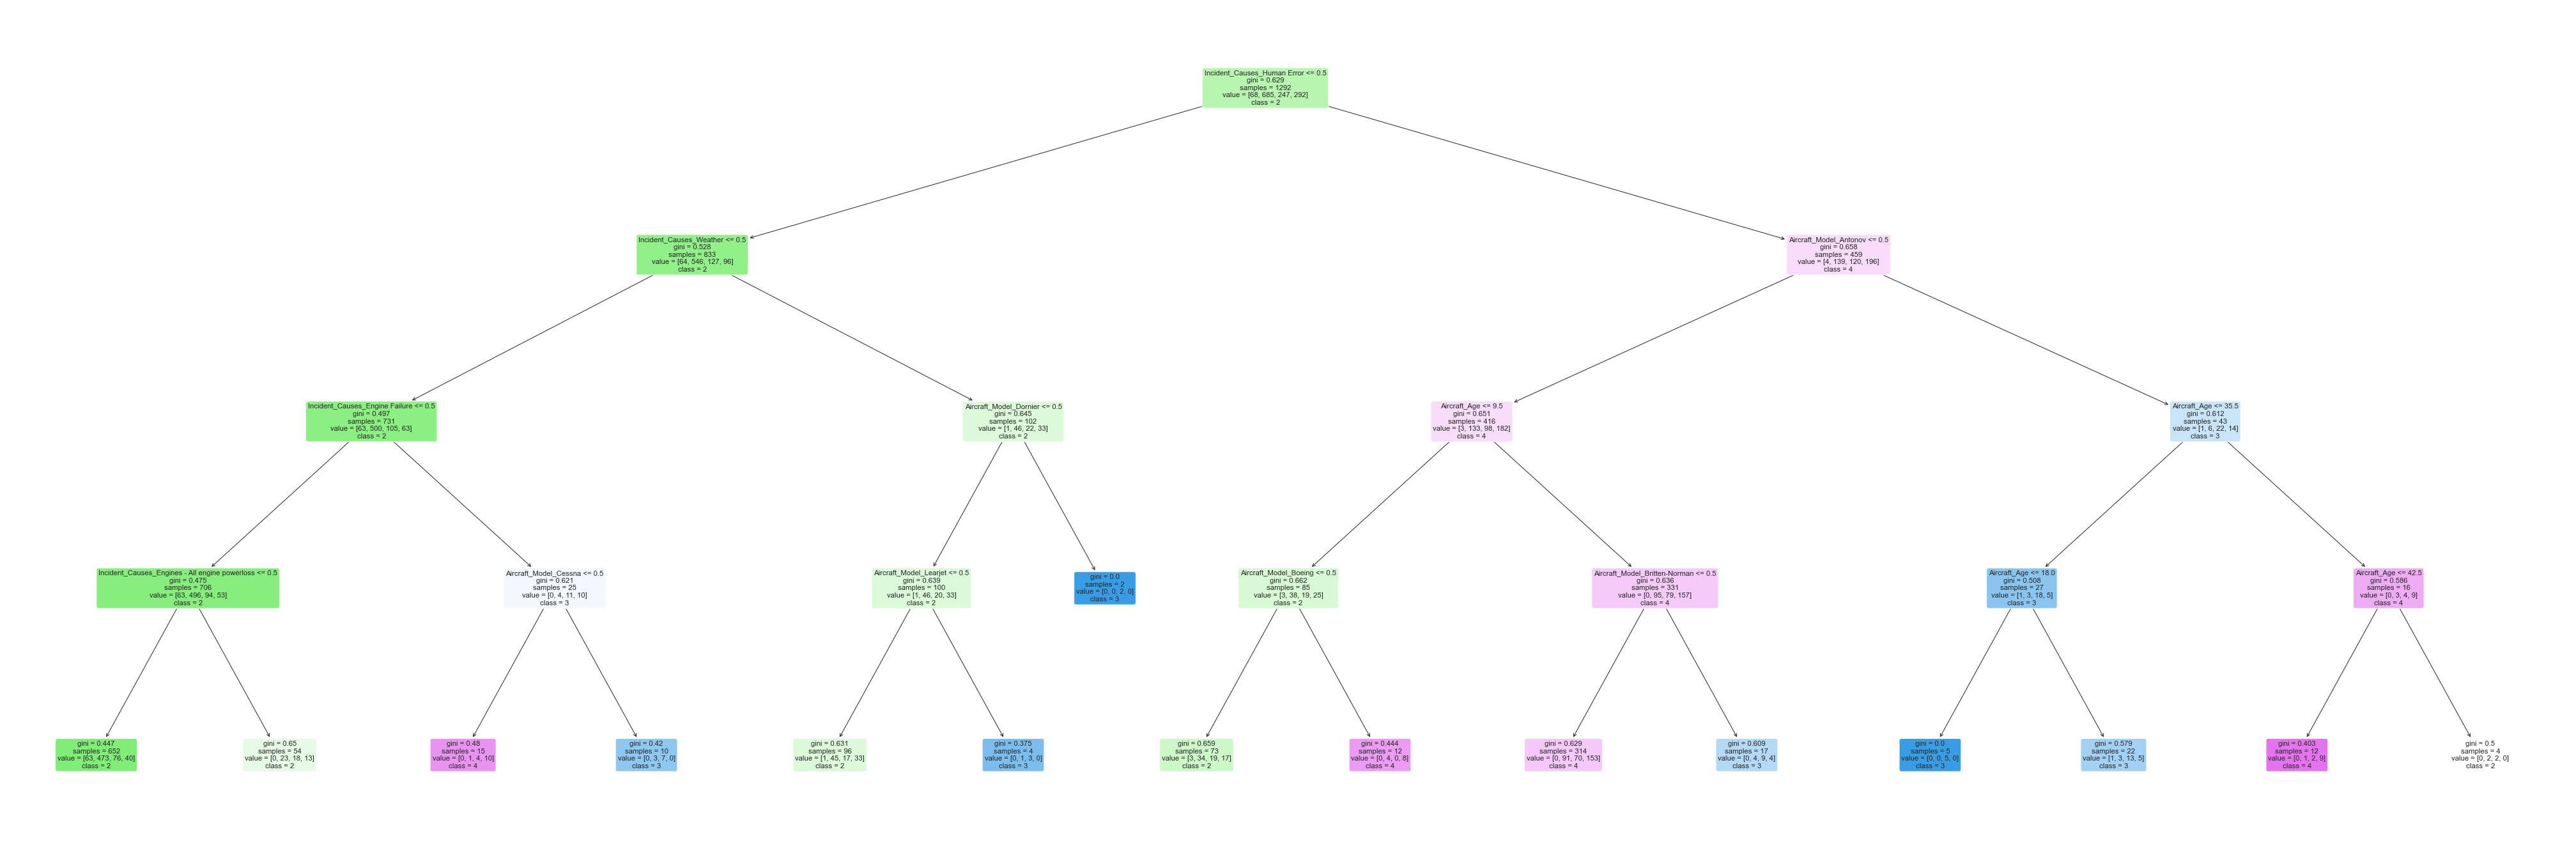

In [48]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(Aircraft_ohe['Aircraft_Damage_Type'])
X = pd.DataFrame(Aircraft_ohe.drop('Aircraft_Damage_Type', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(72,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["1","2","3","4"])

not sure how to conclude from here